In [3]:
import mne
import numpy as np
from pprint import pprint
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import sys
sys.path.append('..')

from dotenv import load_dotenv
import os

load_dotenv()
dataset_path = os.getenv("DATASET_PATH")

In [6]:
#Replace with the path to your .fif file you want to explore
for i in range(6): 
    if i ==5:
        break
    else:
        fif_file = f'{dataset_path}/test/sub-06/run_0{i+1}.fif' 
        raw = mne.io.read_raw_fif(fif_file, preload=True)
        freq = raw.info['sfreq']
        print(raw, freq)

Opening raw data file /srv/openfmri//test/sub-06/run_02.fif...
Isotrak not found
    Range : 0 ... 106974 =      0.000 ...   486.245 secs
Ready.
Reading 0 ... 106974  =      0.000 ...   486.245 secs...
<Raw | run_02.fif, 404 x 106975 (486.2 s), ~330.1 MiB, data loaded> 220.0


/tmp/ipykernel_1407179/3835847588.py:5: RuntimeWarning: This filename (/srv/openfmri//test/sub-06/run_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


# Previewing the data

#### Channel information

In [23]:
# number of channels
n_channels = raw.info['nchan']
print(f'Total number of channels: {n_channels}')

# channel types 
channel_types = raw.get_channel_types()
type_counts = Counter(channel_types)
print(f'Channel types: {type_counts}')

# channel names
channel_names = raw.ch_names
print(f'Channel names ({len(channel_names)}): {channel_names}')

Total number of channels: 404
Channel types: Counter({'grad': 204, 'mag': 102, 'eeg': 74, 'misc': 12, 'chpi': 9, 'stim': 3})
Channel names (404): ['MEG0113', 'MEG0112', 'MEG0111', 'MEG0122', 'MEG0123', 'MEG0121', 'MEG0132', 'MEG0133', 'MEG0131', 'MEG0143', 'MEG0142', 'MEG0141', 'MEG0213', 'MEG0212', 'MEG0211', 'MEG0222', 'MEG0223', 'MEG0221', 'MEG0232', 'MEG0233', 'MEG0231', 'MEG0243', 'MEG0242', 'MEG0241', 'MEG0313', 'MEG0312', 'MEG0311', 'MEG0322', 'MEG0323', 'MEG0321', 'MEG0333', 'MEG0332', 'MEG0331', 'MEG0343', 'MEG0342', 'MEG0341', 'MEG0413', 'MEG0412', 'MEG0411', 'MEG0422', 'MEG0423', 'MEG0421', 'MEG0432', 'MEG0433', 'MEG0431', 'MEG0443', 'MEG0442', 'MEG0441', 'MEG0513', 'MEG0512', 'MEG0511', 'MEG0523', 'MEG0522', 'MEG0521', 'MEG0532', 'MEG0533', 'MEG0531', 'MEG0542', 'MEG0543', 'MEG0541', 'MEG0613', 'MEG0612', 'MEG0611', 'MEG0622', 'MEG0623', 'MEG0621', 'MEG0633', 'MEG0632', 'MEG0631', 'MEG0642', 'MEG0643', 'MEG0641', 'MEG0713', 'MEG0712', 'MEG0711', 'MEG0723', 'MEG0722', 'MEG07

In [24]:
print("Channel information:", raw.info['chs'])

Channel information: [{'scanno': 1, 'logno': 1, 'kind': 1 (FIFFV_MEG_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit': 201 (FIFF_UNIT_T_M), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MEG0113', 'coord_frame': 1 (FIFFV_COORD_DEVICE)}, {'scanno': 2, 'logno': 2, 'kind': 1 (FIFFV_MEG_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit': 201 (FIFF_UNIT_T_M), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MEG0112', 'coord_frame': 1 (FIFFV_COORD_DEVICE)}, {'scanno': 3, 'logno': 3, 'kind': 1 (FIFFV_MEG_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 3024 (FIFFV_COIL_VV_MAG_T3), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit': 112 (FIFF_UNIT_T), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MEG0111', 'coord_frame': 1 (FIFFV_COORD_DEVICE)}, {'scanno': 4, 

In [25]:
import mne

# Check coordinate frame of each channel
coord_frames = [ch['coord_frame'] for ch in raw.info['chs']]
print(coord_frames)

trans = raw.info['dev_head_t']  # Transformation matrix device<->head
print(trans)

[1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_DEVICE), 1 (FIFFV_COORD_

In [26]:
print(raw.ch_names)

['MEG0113', 'MEG0112', 'MEG0111', 'MEG0122', 'MEG0123', 'MEG0121', 'MEG0132', 'MEG0133', 'MEG0131', 'MEG0143', 'MEG0142', 'MEG0141', 'MEG0213', 'MEG0212', 'MEG0211', 'MEG0222', 'MEG0223', 'MEG0221', 'MEG0232', 'MEG0233', 'MEG0231', 'MEG0243', 'MEG0242', 'MEG0241', 'MEG0313', 'MEG0312', 'MEG0311', 'MEG0322', 'MEG0323', 'MEG0321', 'MEG0333', 'MEG0332', 'MEG0331', 'MEG0343', 'MEG0342', 'MEG0341', 'MEG0413', 'MEG0412', 'MEG0411', 'MEG0422', 'MEG0423', 'MEG0421', 'MEG0432', 'MEG0433', 'MEG0431', 'MEG0443', 'MEG0442', 'MEG0441', 'MEG0513', 'MEG0512', 'MEG0511', 'MEG0523', 'MEG0522', 'MEG0521', 'MEG0532', 'MEG0533', 'MEG0531', 'MEG0542', 'MEG0543', 'MEG0541', 'MEG0613', 'MEG0612', 'MEG0611', 'MEG0622', 'MEG0623', 'MEG0621', 'MEG0633', 'MEG0632', 'MEG0631', 'MEG0642', 'MEG0643', 'MEG0641', 'MEG0713', 'MEG0712', 'MEG0711', 'MEG0723', 'MEG0722', 'MEG0721', 'MEG0733', 'MEG0732', 'MEG0731', 'MEG0743', 'MEG0742', 'MEG0741', 'MEG0813', 'MEG0812', 'MEG0811', 'MEG0822', 'MEG0823', 'MEG0821', 'MEG0913'

In [27]:
misc_channels = raw.copy().pick_channels(['MISC201', 'MISC202', 'MISC203', 'MISC204', 'MISC205', 'MISC206', 
                                          'MISC301', 'MISC302', 'MISC303', 'MISC304', 'MISC305', 'MISC306'])
print(misc_channels.info['chs'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
[{'scanno': 384, 'logno': 384, 'kind': 502 (FIFFV_MISC_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 0 (FIFFV_COIL_NONE), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit': -1 (FIFF_UNIT_NONE), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MISC201', 'coord_frame': 0 (FIFFV_COORD_UNKNOWN)}, {'scanno': 385, 'logno': 385, 'kind': 502 (FIFFV_MISC_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 0 (FIFFV_COIL_NONE), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit': -1 (FIFF_UNIT_NONE), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MISC202', 'coord_frame': 0 (FIFFV_COORD_UNKNOWN)}, {'scanno': 386, 'logno': 386, 'kind': 502 (FIFFV_MISC_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 0 (FIFFV_COIL_NONE), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit': -1 (FIFF_UNIT_NONE), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MISC203', 

#### Sampling information
  

In [7]:
# number of samples
n_samples = raw.n_times
print(f'Number of samples (frames): {n_samples}')

# sampling frequency        
sfreq = raw.info['sfreq']
print(f'Sampling frequency: {sfreq} Hz')

# duration of recording 
duration = n_samples / sfreq
print(f'Duration of recording: {duration} seconds')

Number of samples (frames): 106975
Sampling frequency: 220.0 Hz
Duration of recording: 486.25 seconds


## Accessign data format

#### Data info
- Data shape
- Data type

In [8]:
data = raw.get_data()

# Data shape
print(f'Data shape (n_channels x n_times): {data.shape}')

# Data type
print(f'Data type: {data.dtype}')

Data shape (n_channels x n_times): (404, 106975)
Data type: float64


#### Channel acess

In [9]:
# Channel Indices
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
# print(f'EEG channel indices: {eeg_indices}')
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'Number of MEG channels: {len(meg_indices)}')

# EEG and MEG Data
eeg_data = data[eeg_indices, :]
meg_data = data[meg_indices, :]
print(f'EEG data shape: {eeg_data.shape}')
print(f'MEG data shape: {meg_data.shape}')

# Optional: Separate MEG magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')
print(f'\nNumber of MEG magnetometer channels: {len(mag_indices)}')
print(f'Number of gradiometer channels: {len(grad_indices)}')

Number of EEG channels: 74
Number of MEG channels: 306
EEG data shape: (74, 106975)
MEG data shape: (306, 106975)

Number of MEG magnetometer channels: 102
Number of gradiometer channels: 204


In [10]:
# Get indices of MEG channels
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
print(f'Number of MEG channels: {len(meg_indices)}')
print(f'MEG channel indices: {meg_indices}')

# Optional: Separate MEG magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')
print(f'Number of magnetometer channels: {len(mag_indices)}')
print(f'Number of gradiometer channels: {len(grad_indices)}')

print(f'Magnetometer indices: {mag_indices}')

# Get indices of EEG channels
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'EEG channel indices: {eeg_indices}')

Number of MEG channels: 306
MEG channel indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [11]:
import numpy as np


indices = np.arange(2,306,3)
assert np.array_equal(indices, mag_indices), "Not the same"

indices = np.arange(306, 380, 1)
assert np.array_equal(indices, eeg_indices), "Not the same"

In [ ]:
channel_info = pd.DataFrame({
    'Name': raw.ch_names,
    'Type': raw.get_channel_types(),
    'Unit': [raw._orig_units.get(ch, 'NA') for ch in raw.ch_names],
    'Sampling Frequency': [sfreq] * n_channels
})
print(channel_info.head())

# Plotting

#### Plotting EEG & MEG electrodes

-  Selecting two closest electrodes for two different participants

In [5]:
# Import data

import os
import mne
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ---------------------------
rang = 6
fif_path = "/srv/openfmri/train/sub-01/run_05.fif"  # Replace with the actual path

raw = mne.io.read_raw_fif(fif_path, preload=True)

# Extract the data as a NumPy array: shape (n_channels, n_times)
original_data = raw.get_data()

n_channels, n_times = original_data.shape

# Safety check before slicing
if eeg_channel_index >= n_channels or mag_channel_index >= n_channels:
    raise IndexError("Channel index is out of range for the provided FIF file.")

if num_frames_to_plot > n_times:
    raise ValueError(f"Requested {num_frames_to_plot} frames but file only has {n_times} frames." +
                        " Reduce 'num_frames_to_plot' or choose a file with more data.")

# Slice out the desired number of frames
eeg_signal = original_data[eeg_channel_index, :num_frames_to_plot]
mag_signal = original_data[mag_channel_index, :num_frames_to_plot]

eeg_electrode = 13 
mag_electrode = 65
n_frames = 2500 

"""
Jupyter Notebook script to plot EEG (red) and MEG (blue) electrode positions for:
 - Subject 3, Run 1
 - Subject 5, Run 1

Note:
 - Subject 3 is located in /srv/openfmri/val/sub-03/
 - Subject 5 is located in /srv/openfmri/train/sub-05/
 - We ignore the *_shards/ directories; we only need the *.fif files.

You can run this as a single cell in Jupyter.
"""

import mne
import plotly.graph_objects as go
import numpy as np

def load_channel_positions(fif_path):
    """
    Load raw data and extract 3D locations for EEG and MAG (magnetometer) channels.
    Excludes GRAD (gradiometer) sensors.
    """
    raw = mne.io.read_raw_fif(fif_path, preload=False)
    chs = raw.info['chs']
    eeg_ix = mne.pick_types(raw.info, meg=False, eeg=True)
    # Specifically select only magnetometers (mag=True, grad=False)
    mag_ix = mne.pick_types(raw.info, meg='mag', eeg=False)

    eeg_xyz = []
    eeg_names = []
    for idx in eeg_ix:
        pos = chs[idx]['loc'][:3]
        eeg_xyz.append(pos)
        eeg_names.append(chs[idx]['ch_name'])

    mag_xyz = []
    mag_names = []
    for idx in mag_ix:  # Now only includes magnetometers
        pos = chs[idx]['loc'][:3]
        mag_xyz.append(pos)
        mag_names.append(chs[idx]['ch_name'])

    return np.array(eeg_xyz), eeg_names, np.array(mag_xyz), mag_names

def plot_3d_electrodes(eeg_xyz, eeg_names, meg_xyz, meg_names, fig_title="Electrode Plot"):
    """
    Creates a 3D plot with Plotly, showing:
    - EEG electrodes in red (except index 13 in green)
    - MEG sensors in blue (except index 65 in green)
    - Channel names as hover text
    """
    fig = go.Figure()

    # EEG electrodes (split into regular red and highlighted green)
    eeg_highlight_idx = 12
    
    # Regular EEG electrodes (red)
    mask_regular = list(range(len(eeg_xyz)))
    mask_regular.remove(eeg_highlight_idx)
    
    fig.add_trace(
        go.Scatter3d(
            x=eeg_xyz[mask_regular,0],
            y=eeg_xyz[mask_regular,1],
            z=eeg_xyz[mask_regular,2],
            mode='markers+text',
            marker=dict(size=5, color='red'),
            text=[eeg_names[i] for i in mask_regular],
            textposition="top center",
            name="EEG (regular)"
        )
    )
    
    # Highlighted EEG electrode (green)
    fig.add_trace(
        go.Scatter3d(
            x=[eeg_xyz[eeg_highlight_idx,0]],
            y=[eeg_xyz[eeg_highlight_idx,1]],
            z=[eeg_xyz[eeg_highlight_idx,2]],
            mode='markers+text',
            marker=dict(size=8, color='green'),  # Slightly larger size for visibility
            text=[eeg_names[eeg_highlight_idx]],
            textposition="top center",
            name=f"EEG {eeg_names[eeg_highlight_idx]}"
        )
    )

    # MEG sensors (split into regular blue and highlighted green)
    meg_highlight_idx = 21
    
    # Regular MEG sensors (blue)
    mask_regular = list(range(len(meg_xyz)))
    mask_regular.remove(meg_highlight_idx)
    
    fig.add_trace(
        go.Scatter3d(
            x=meg_xyz[mask_regular,0],
            y=meg_xyz[mask_regular,1],
            z=meg_xyz[mask_regular,2],
            mode='markers+text',
            marker=dict(size=5, color='blue'),
            text=[meg_names[i] for i in mask_regular],
            textposition="top center",
            name="MEG (regular)"
        )
    )
    
    # Highlighted MEG sensor (green)
    fig.add_trace(
        go.Scatter3d(
            x=[meg_xyz[meg_highlight_idx,0]],
            y=[meg_xyz[meg_highlight_idx,1]],
            z=[meg_xyz[meg_highlight_idx,2]],
            mode='markers+text',
            marker=dict(size=8, color='green'),  # Slightly larger size for visibility
            text=[meg_names[meg_highlight_idx]],
            textposition="top center",
            name=f"MEG {meg_names[meg_highlight_idx]}"
        )
    )

    fig.update_layout(
        title=fig_title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        width=800,
        height=700
    )
    fig.show()

# --------------------------------------------------------
# Adjust these paths to match your environment if needed:
root_path = "/srv/openfmri"

# Subject 3 is in val folder:
sub_3 = "sub-03"
sub_3_path = f"{root_path}/val/{sub_3}"

# Subject 5 is in train folder:
sub_5 = "sub-05"
sub_5_path = f"{root_path}/train/{sub_5}"

# Plot for run_01 for each subject
# --------------------------------------------------------

###### Subject 3, Run 1
fif_3_1 = f"{sub_3_path}/run_02.fif"
eeg_xyz_3_1, eeg_names_3_1, meg_xyz_3_1, meg_names_3_1 = load_channel_positions(fif_3_1)
plot_3d_electrodes(
    eeg_xyz_3_1,
    eeg_names_3_1,
    meg_xyz_3_1,
    meg_names_3_1,
    fig_title="Subject 3, Run 1 (EEG=red, MEG=blue)"
)

###### Subject 5, Run 1
sub_5_run_1_fif = f"{sub_5_path}/run_03.fif"
eeg_xyz_5_1, eeg_names_5_1, meg_xyz_5_1, meg_names_5_1 = load_channel_positions(sub_5_run_1_fif)
plot_3d_electrodes(
    eeg_xyz_5_1,
    eeg_names_5_1,
    meg_xyz_5_1,
    meg_names_5_1,
    fig_title="Subject 5, Run 1 (EEG=red, MEG=blue)"
)

Opening raw data file /srv/openfmri/train/sub-01/run_05.fif...
Isotrak not found
    Range : 0 ... 111099 =      0.000 ...   504.995 secs
Ready.
Reading 0 ... 111099  =      0.000 ...   504.995 secs...
Opening raw data file /srv/openfmri/val/sub-03/run_02.fif...
    Range : 70400 ... 575299 =     64.000 ...   522.999 secs
Ready.


Opening raw data file /srv/openfmri/train/sub-05/run_03.fif...
    Range : 40700 ... 225499 =     37.000 ...   204.999 secs
Ready.


#### Plotting EEG spectogramm

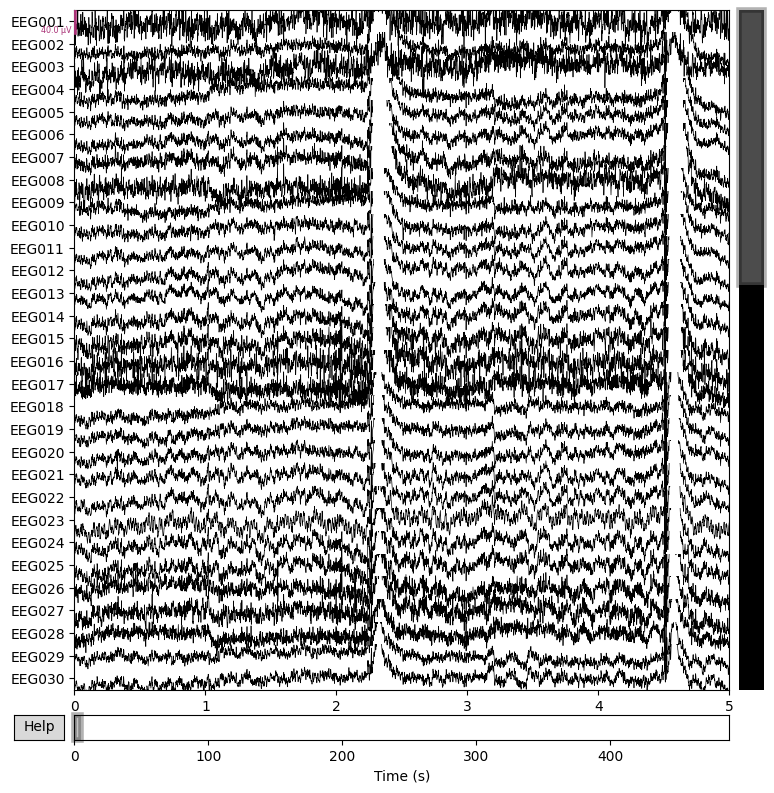

In [23]:
# Plot EEG data
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
raw.plot(picks=eeg_indices, duration=5, n_channels=30, title='EEG Data')
plt.show()

#### Plotting MEG spectogramm

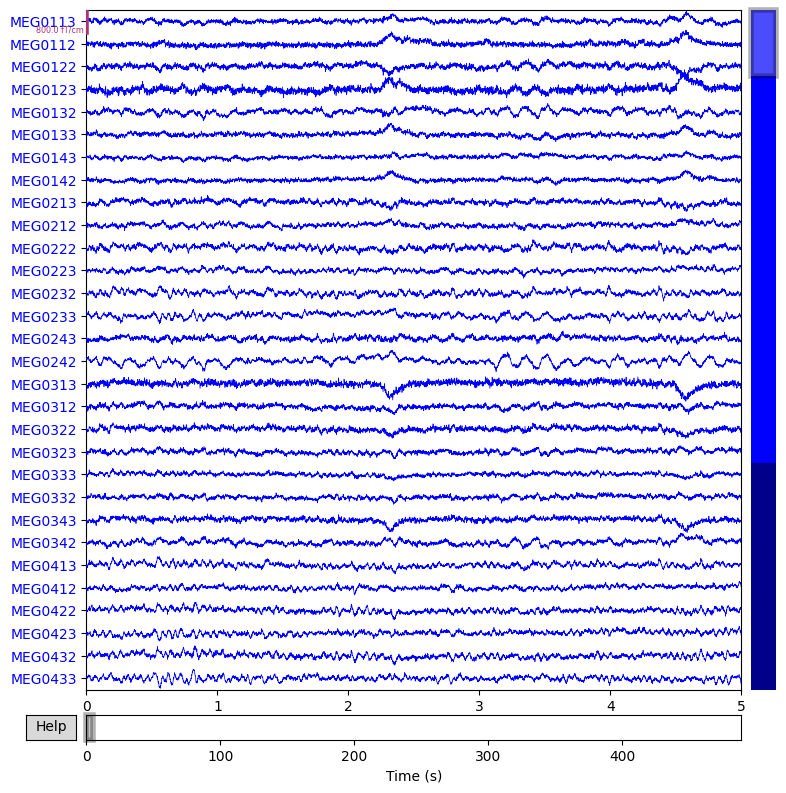

In [24]:
# Pick MEG channels
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)

# Plot MEG data
raw.plot(picks=meg_indices, duration=5, n_channels=30, title='MEG Data')
plt.show()


Number of EEG channels: 74
Number of MEG channels: 306
EEG data shape: (74, 537900)
MEG data shape: (306, 537900)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_459069/264725723.py:19: RuntimeWarning:

(X, Y) fit (-3.0, 35.9) more than 20 mm from head frame origin



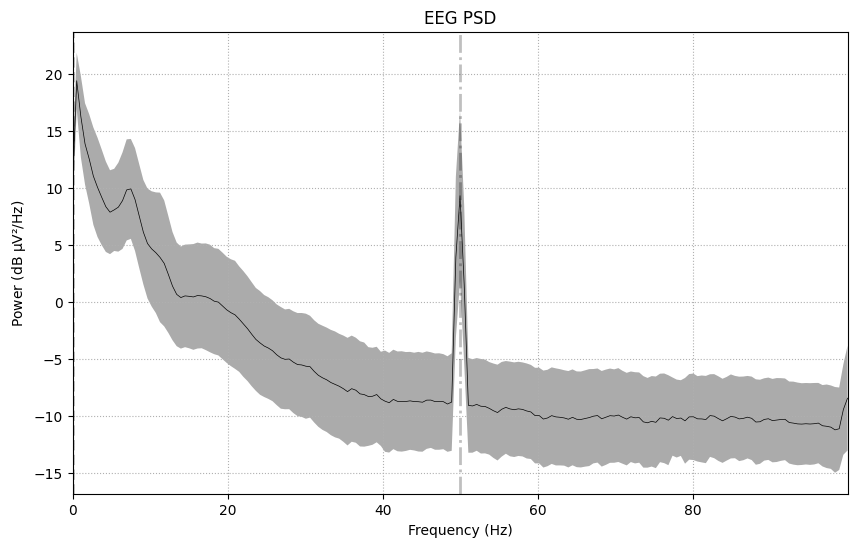

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)


/tmp/ipykernel_459069/264725723.py:29: RuntimeWarning:

(X, Y) fit (-3.0, 35.9) more than 20 mm from head frame origin



Plotting power spectral density (dB=True).


/tmp/ipykernel_459069/264725723.py:32: RuntimeWarning:

(X, Y) fit (-3.0, 35.9) more than 20 mm from head frame origin



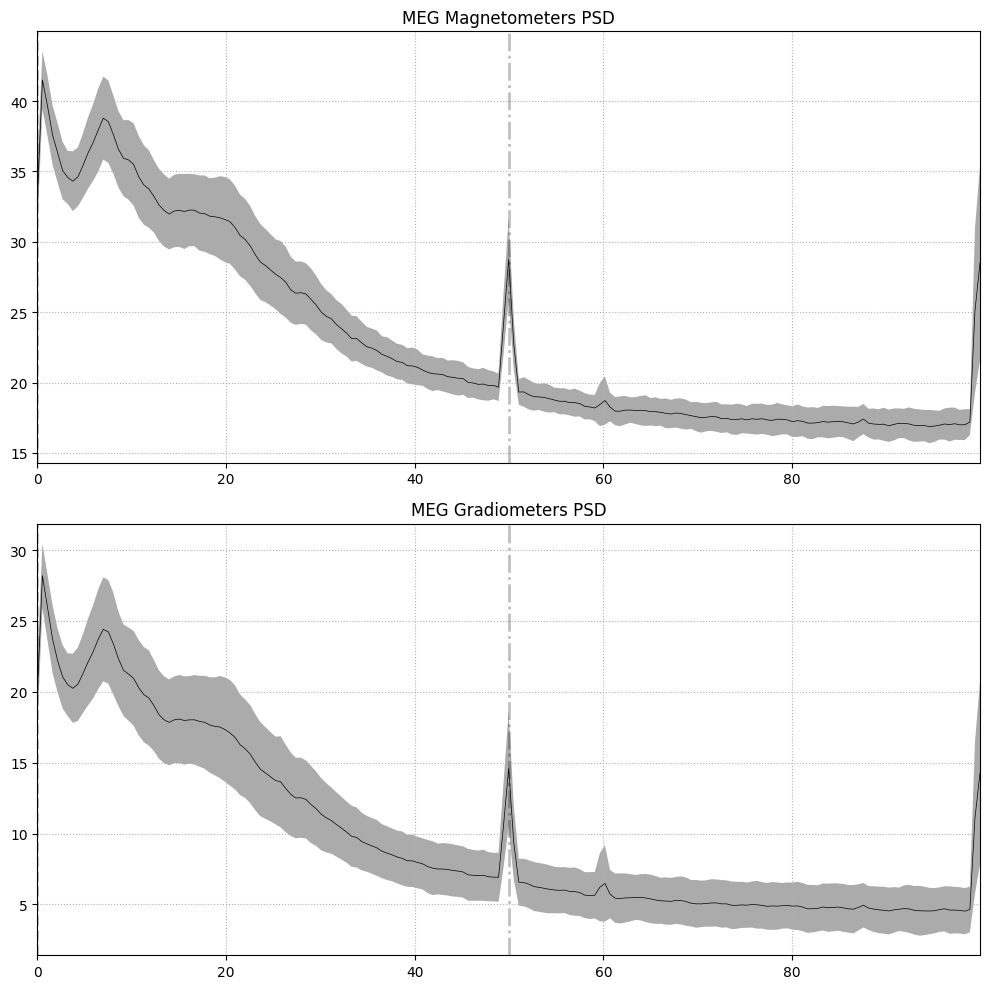

292 events found on stim channel STI101
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  273  274 4096 4101 4103 4109 4110 4113 4114 4115]
Found 292 events.
[[158992      0      5]
 [160126      0   4096]
 [162409      0      6]
 [163526      0   4096]
 [165790      0     17]
 [166995      0    256]
 [169245      0     18]
 [169988     18    274]
 [172736      0     13]
 [174321      0    256]
 [176172      0     14]
 [177551      0    256]
 [179572      0     17]
 [181699      0    256]
 [182953      0     13]
 [184641      0    256]
 [186370      0     14]
 [187847      0    256]
 [189880      0     17]
 [191445      0    256]
 [193427      0     18]
 [194740      0    256]
 [196881      0      5]
 [198690      0    256]
 [200207      0     17]
 [201623      0   4096]
 [203717      0      5]
 [205165      0   4096]
 [207209      0     19]
 [209093      0   4096]
 [210865      0     17]
 [212748      0   4096]
 [214265      0      5]
 [215916   

In [25]:

# Channel Indices
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'Number of MEG channels: {len(meg_indices)}')

# EEG and MEG Data
eeg_data = data[eeg_indices, :]
meg_data = data[meg_indices, :]
print(f'EEG data shape: {eeg_data.shape}')
print(f'MEG data shape: {meg_data.shape}')

# Units Conversion
eeg_data_uv = eeg_data * 1e6  # Convert EEG data to µV
meg_data_ft = meg_data * 1e15  # Convert MEG data to fT (magnetometers)

# Power Spectral Density for EEG
fig, ax = plt.subplots(figsize=(10, 6))
raw.plot_psd(picks=eeg_indices, fmax=100, average=True, spatial_colors=False, ax=ax)
ax.set_title('EEG PSD')
plt.show()

# Power Spectral Density for MEG
# Separate plots for magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
raw.plot_psd(picks=mag_indices, fmax=100, average=True, spatial_colors=False, ax=ax1)
ax1.set_title('MEG Magnetometers PSD')

raw.plot_psd(picks=grad_indices, fmax=100, average=True, spatial_colors=False, ax=ax2)
ax2.set_title('MEG Gradiometers PSD')
plt.tight_layout()
plt.show()


# Events and Annotations
events = mne.find_events(raw, stim_channel='STI101')
print(f'Found {len(events)} events.')
print(events)
print('Annotations:')
print(raw.annotations)

# Measurement Info
print('Measurement Info:')
pprint(raw.info)